# Final Asignment 

## Question 1: Use yfinance to Extract Stock Data

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import yfinance as yf

# Create a ticker object for Tesla
tesla_ticker = yf.Ticker('TSLA')

# Extract stock information with the maximum period
tesla_data = tesla_ticker.history(period='max')

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows of the tesla_data dataframe
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

# Step 2: Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Step 3: Extract the table with Tesla Revenue
tables = pd.read_html(str(soup))
tesla_revenue = tables[1]  # Assuming the second table contains Tesla Revenue

# Rename the columns to 'Date' and 'Revenue'
tesla_revenue.columns = ['Date', 'Revenue']

# Step 4: Clean the Revenue column
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

# Step 5: Remove null or empty strings in the Revenue column
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display the last 5 rows of the tesla_revenue dataframe
print(tesla_revenue.tail())


          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


## Question 3: Use yfinance to Extract Stock Data


In [4]:
import yfinance as yf

# Create a ticker object for GameStop
gme_ticker = yf.Ticker('GME')

# Extract stock information with the maximum period
gme_data = gme_ticker.history(period='max')

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data dataframe
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603295  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data = response.text

# Step 2: Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Step 3: Extract the table with GameStop Revenue
tables = pd.read_html(str(soup))
gme_revenue = tables[1]  # Assuming the second table contains GameStop Revenue

# Rename the columns to 'Date' and 'Revenue'
gme_revenue.columns = ['Date', 'Revenue']

# Step 4: Clean the Revenue column
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)

# Step 5: Remove null or empty strings in the Revenue column
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Display the last 5 rows of the gme_revenue dataframe
print(gme_revenue.tail())


          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


## Question 5: Plot Tesla Stock Graph

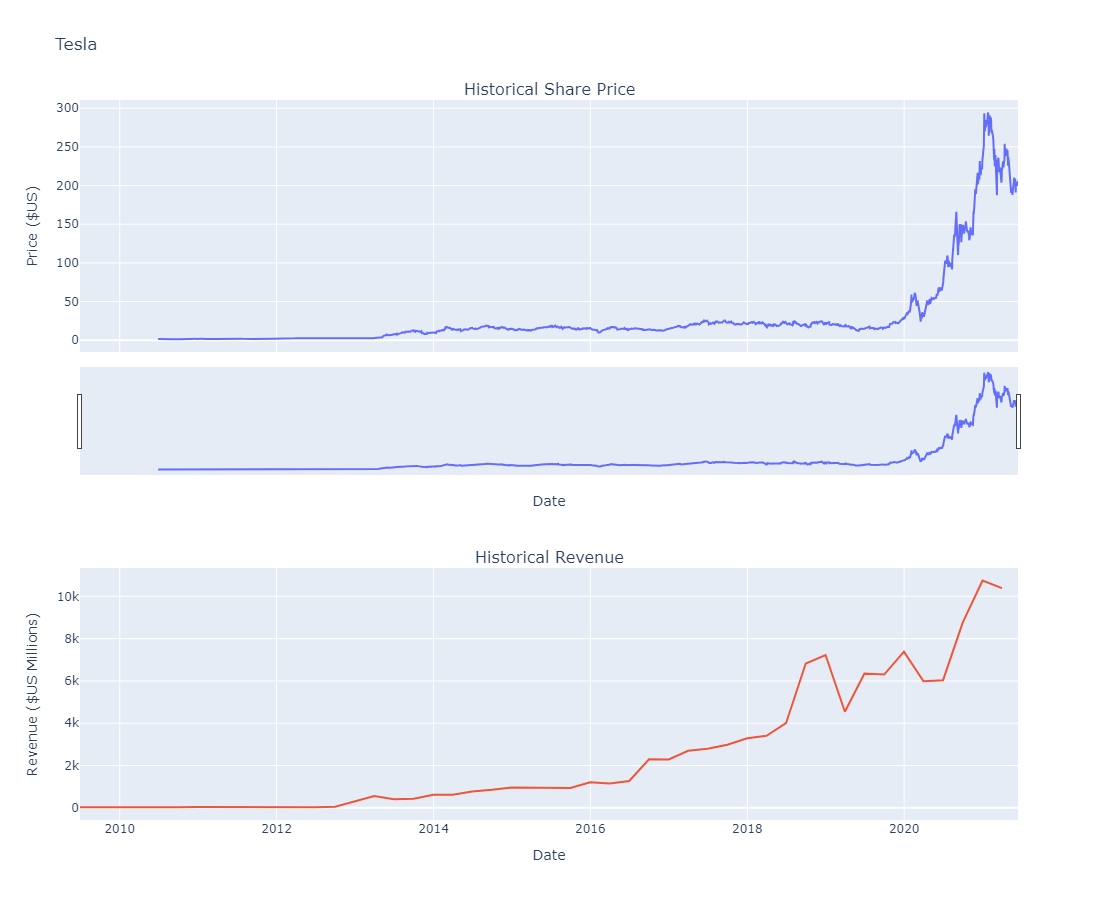

In [15]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Step 1: Fetch Tesla stock data
tesla_ticker = yf.Ticker('TSLA')
tesla_data = tesla_ticker.history(period='max')
tesla_data.reset_index(inplace=True)

# Step 2: Download and parse Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text
soup = BeautifulSoup(html_data, 'html.parser')
tables = pd.read_html(str(soup))
tesla_revenue = tables[1]  # Assuming the second table contains Tesla Revenue
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Step 3: Define the make_graph function
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=.3)
    
    # Filter data to include only up to June 2021
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    # Add trace for stock data
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    
    # Add trace for revenue data
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    
    # Update x-axis titles
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    
    # Update y-axis titles
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    # Update layout
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    
    # Show the graph
    fig.show()

# Step 4: Call the function to create the graph for Tesla
make_graph(tesla_data, tesla_revenue, 'Tesla')


## Question 6: Plot GameStop Stock Graph

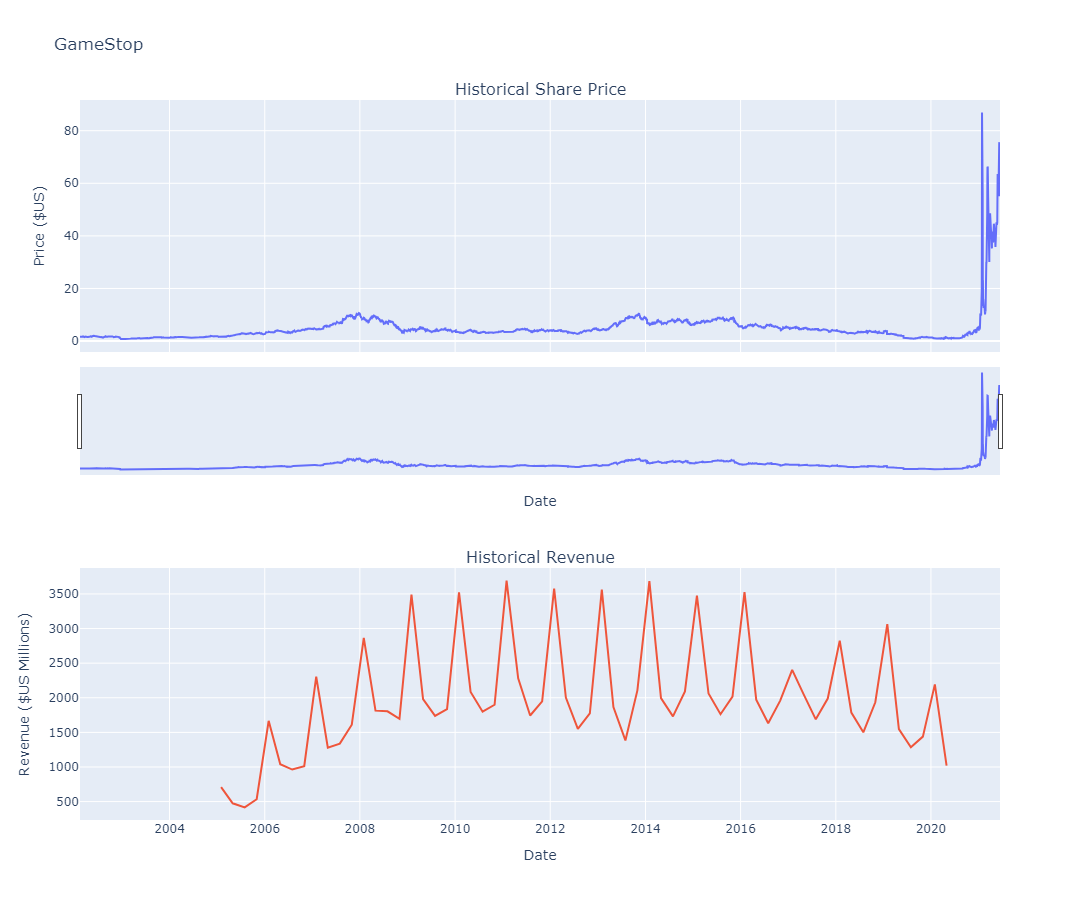

In [19]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Step 1: Fetch GME stock data
gme_ticker = yf.Ticker('GME')
gme_data = gme_ticker.history(period='max')
gme_data.reset_index(inplace=True)

# Step 2: Download and parse GME revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data = response.text
soup = BeautifulSoup(html_data, 'html.parser')
tables = pd.read_html(str(soup))
gme_revenue = tables[1]  # A
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Step 3: Define the make_graph function
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=.3)
    
    # Filter data to include only up to June 2021
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    # Add trace for stock data
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    
    # Add trace for revenue data
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    
    # Update x-axis titles
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    
    # Update y-axis titles
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    # Update layout
    fig.update_layout(showlegend=False,
                      height=900,
                      title=stock,
                      xaxis_rangeslider_visible=True)
    
    # Show the graph
    fig.show()

# Step 4: Call the function to create the graph for Tesla
make_graph(gme_data, gme_revenue, 'GameStop')
